<a href="https://colab.research.google.com/github/HANISY/FastCampus-EXPORT-Data-Analysis/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패스트캠퍼스 바이트디그리 2기 최종 프로젝트 과제

# Introduction

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
order = pd.read_table('/content/drive/MyDrive/파이널 프로젝트 데이터/order-9968.txt',sep=",")
customer = pd.read_excel('/content/drive/MyDrive/파이널 프로젝트 데이터/customer-9968.xlsx')
course = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트 데이터/course-9968.csv')
refund = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트 데이터/refund-9968.csv')
user = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트 데이터/user-9968.csv')

# 1. Data Extract - SQL


- Q1-1. 5개의 테이블(order, customer, course, refund, user)을 하나의 테이블로 조인하는 쿼리를 작성해주세요.

- Q1-2. (Order) 각 강의별 가장 첫 번째로 신청한 유저와 가장 마지막에 신청한 유저와 그 때의 날짜를 구하시오. (First_Value, Last_value, partition by)

- Q1-3. Order 테이블의 list_price를 월별로 합계한 후, 전달 대비 얼마나 증가하였는지, %지를 구하시오(lead, lag)

# 2. Data Analysis & Visualization
- **Analysis Too**l: Python, Excel, Tableau
- **Visualization Tool**: Tableau , Power BI, Excel, Python(matplotlib, seaborn, plotly)

### 2.1 Descriptive Analysis

- Q2-1 (Order) 2022년 1월 중 가장 매출이 높았던 3일과 낮았던 3일은 언제인가요?
(status = COMPLETED 기준)
- Q2-2 (Order) 그리고 그 때의 매출액(list_price)과, 주문 수, 신청자 수, 강의 수는 각각 얼마인가요?
- Q2-3 (Order) 월별 각 강의 별 할인율은 어떻게 될까요?
- Q2-4 (Course) 강의 키워드에서 가장 많이 언급된 단어는 무엇인가요?

- Q2-5 (Refund) 환불이 가장 많은 강의는 어떤 강의였나요?
- Q2-6 (Customer) 강의를 가장 많이 신청한 고객과 그 금액은 얼마인가요?
- Q2-7 (Order) 주말과 주중의 평균 강의 신청율은 어떻게 다를까요?
- Q2-8 (User) 주로 몇시에 회원 가입(created_at)이 활발했나요? 월별로 차이가 있는지 보여주고, 그 근거를 추론해 보세요
- Q2-9 (Order) 강의 가격(list_price)을 5만원 단위의 도수분포표로 나타내 주세요.
- Q2-10 (Order) 신청이 완료된 강의(complated)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중을 월별로 각각 구하시오?
- Q2-11 (User) state이 HIBERNATED 된 Used들은 ID를 생성(created_at)하고 마지막 로그인(last_login_at)까지 평균적으로 몇일이 걸렸나요?

#### Q2-1 (Order) 2022년 1월 중 가장 매출이 높았던 3일과 낮았던 3일은 언제인가요? (state = COMPLETED 기준)

In [ ]:
order

,id,type,state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000
3,1600577,ORDER,COMPLETED,백엔드 개발자를 위,2022-12-31 23:35:52,2022-12-31 23:36:09,1083664,20000,20000,10000,20000
4,1600574,ORDER,COMPLETED,React Nati,2022-12-31 23:30:51,2022-12-31 23:31:13,1033553,20000,20000,0,20000
...,...,...,...,...,...,...,...,...,...,...,...
284030,773397,ORDER,COMPLETED,한 번에 끝내는 딥,2022-01-01 00:18:42,2022-01-01 00:18:44,753996,30000,0,30000,0
284031,773396,ORDER,COMPLETED,초격차 패키지 :,2022-01-01 00:18:33,2022-01-01 00:18:57,12693,30000,30000,0,30000
284032,773394,ORDER,CANCELLED,한 번에 끝내는 딥,2022-01-01 00:17:19,2022-01-01 00:17:29,753996,30000,30000,0,30000
284033,773392,ORDER,PENDING,초격차 패키지 :,2022-01-01 00:13:43,2022-01-01 00:13:43,12693,30000,30000,0,30000


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284035 entries, 0 to 284034
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              284035 non-null  int64 
 1   type            284035 non-null  object
 2   state           284035 non-null  object
 3   name            284035 non-null  object
 4   created_at      284035 non-null  object
 5   updated_at      284035 non-null  object
 6   customer_id     284035 non-null  int64 
 7   list_price      284035 non-null  int64 
 8   sale_price      284035 non-null  int64 
 9   discount_price  284035 non-null  int64 
 10  tax_free_price  284035 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 23.8+ MB


In [ ]:
# created_at 컬럼을 datetime 타입으로 변환
# created_at : 레코드가 생성된 시간
order['created_at'] = pd.to_datetime(order['created_at'])
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284035 entries, 0 to 284034
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              284035 non-null  int64         
 1   type            284035 non-null  object        
 2   state           284035 non-null  object        
 3   name            284035 non-null  object        
 4   created_at      284035 non-null  datetime64[ns]
 5   updated_at      284035 non-null  object        
 6   customer_id     284035 non-null  int64         
 7   list_price      284035 non-null  int64         
 8   sale_price      284035 non-null  int64         
 9   discount_price  284035 non-null  int64         
 10  tax_free_price  284035 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 23.8+ MB


In [ ]:
# created_at 컬럼에서 날짜만 추출하여 order_date 컬럼 생성
order['order_date'] = order['created_at'].dt.date
order['order_date'] = pd.to_datetime(order['order_date'])
order.head()

,id,type,state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,order_date
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0,2022-12-31
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000,2022-12-31
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000,2022-12-31
3,1600577,ORDER,COMPLETED,백엔드 개발자를 위,2022-12-31 23:35:52,2022-12-31 23:36:09,1083664,20000,20000,10000,20000,2022-12-31
4,1600574,ORDER,COMPLETED,React Nati,2022-12-31 23:30:51,2022-12-31 23:31:13,1033553,20000,20000,0,20000,2022-12-31


In [ ]:
# 1월 주문 완료 건 추출
complete_order_1 = order[(order['order_date'].dt.month == 1) & (order['state'] == 'COMPLETED')]

# 주문일자별 총 매출액 계산
total_sales_1 = complete_order_1.groupby('order_date')['list_price'].sum()

# 결과 출력
print("1월 중 총매출액이 가장 높았던 3일")
print(total_sales_1.nlargest(3))
print("\n1월 중 총매출액이 가장 낮았던 3일")
print(total_sales_1.nsmallest(3))

1월 중 총매출액이 가장 높았던 3일
order_date
2022-01-03    48980000
2022-01-07    34700000
2022-01-05    33840000
Name: list_price, dtype: int64

1월 중 총매출액이 가장 낮았던 3일
order_date
2022-01-01    6260000
2022-01-22    6850000
2022-01-29    8920000
Name: list_price, dtype: int64


#### Q2-2 (Order) 그리고 그 때의 매출액(list_price)과, 주문 수, 신청자 수, 강의 수는 각각 얼마인가요?

In [ ]:
# 주문일자별 주문 수 계산
order_count_1 = complete_order_1.groupby('order_date')['id'].count()

# 주문일자별 주문자 수 계산
unique_customers_1 = complete_order_1.groupby('order_date')['customer_id'].nunique()

# 주문일자별 강의 수 계산
course_count_1 = complete_order_1.groupby('order_date')['name'].nunique()

# 결과를 하나의 데이터프레임으로 합치기
result = pd.DataFrame({
    '총 매출액': total_sales_1,
    '주문 수': order_count_1,
    '신청자 수': unique_customers_1,
    '강의 수': course_count_1
})

# 총 매출액 기준으로 내림차순 정렬하여 가장 많은 3일 선택
top_3_days = result.nlargest(3, '총 매출액')

# 총 매출액 기준으로 오름차순 정렬하여 가장 적은 3일 선택
bottom_3_days = result.nsmallest(3, '총 매출액')

# 결과 출력
print("1월 중 총매출액이 가장 높았던 3일")
print(top_3_days[['총 매출액', '주문 수', '신청자 수', '강의 수']])
print("\n1월 중 총매출액이 가장 낮았던 3일")
print(bottom_3_days[['총 매출액', '주문 수', '신청자 수', '강의 수']])

1월 중 총매출액이 가장 높았던 3일
               총 매출액  주문 수  신청자 수  강의 수
order_date                             
2022-01-03  48980000  1863   1671   187
2022-01-07  34700000  1305   1136   179
2022-01-05  33840000  1276   1149   172

1월 중 총매출액이 가장 낮았던 3일
              총 매출액  주문 수  신청자 수  강의 수
order_date                            
2022-01-01  6260000   238    223    91
2022-01-22  6850000   217    186   105
2022-01-29  8920000   332    298   107


#### Q2-3 (Order) 월별 각 강의 별 할인율은 어떻게 될까요?

In [ ]:
# 조건에 맞지 않는 행을 필터링하여 개수를 확인
invalid_rows = order[order['list_price'] - order['discount_price'] != order['sale_price']]
num_invalid_rows = len(invalid_rows)

print("조건을 만족하지 않는 행의 수:", num_invalid_rows)

조건을 만족하지 않는 행의 수: 75524


```
list_price - discount_price ≠ sale_price 경우 처리 필요
(전체 데이터의 약 26.59% 차지)
```

In [ ]:
# 할인율 계산
order['discount_rate'] = (order['discount_price'] / order['list_price']) * 100

# 월별 강의별 할인율 계산
monthly_discount_rate = order.groupby([order['order_date'].dt.month, 'name'])['discount_rate'].mean().round(2)

# 결과 출력
print(monthly_discount_rate.apply(lambda x: f'{x:.3f}%'))

order_date  name      
1           (B2B) 42SE     0.000%
            (B2B) K-Di    50.000%
            (B2B) 디캠프      0.000%
            (B2B) 비바리퍼     0.000%
            (B2B) 빌리지베     0.000%
                           ...   
12          현업 프로젝트로 배     0.000%
            현직 Advisor    14.290%
            화사한 색감과 빛의    41.670%
            확실하게 끝내는 포    45.830%
            히어로부터 크리쳐까    52.380%
Name: discount_rate, Length: 4496, dtype: object


In [ ]:
# 각 강의별 할인율 계산
course_discount_rate = order.groupby('name')['discount_rate'].mean().round(2)

# 결과 출력
print(course_discount_rate.apply(lambda x: f'{x:.3f}%'))

name
\n한번에 끝내는 E    24.190%
 CLASS : 색     21.050%
 K-Digital      0.000%
 [VOD+출판권]     14.890%
 서비스 기획 PM     50.000%
                ...   
현직 VC가 알려주      1.690%
화사한 색감과 빛의     32.140%
확실하게 끝내는 포     32.450%
확장성 높은 아키텍      0.000%
히어로부터 크리쳐까     33.240%
Name: discount_rate, Length: 1110, dtype: object


#### Q2-4 (Course) 강의 키워드에서 가장 많이 언급된 단어는 무엇인가요?

In [ ]:
course

,id,type,state,created_at,updated_at,title,description,close_at,total_class_hours,keywords
0,214903,COURSE,ONGOING,2022-12-27 1:33,2022-12-27 1:33,(B2G) K-Di-214903,NaN,NaN,NaN,NaN
1,214898,COURSE,ONGOING,2022-12-26 12:25,2022-12-26 12:25,(B2G) K-Di-214898,NaN,NaN,NaN,NaN
2,214897,COURSE,ONGOING,2022-12-26 12:20,2022-12-26 12:20,(B2G) K-Di-214897,NaN,NaN,NaN,NaN
3,214896,COURSE,ONGOING,2022-12-26 12:17,2022-12-26 12:17,(B2G) K-Di-214896,NaN,NaN,NaN,NaN
4,214895,COURSE,ONGOING,2022-12-26 12:14,2022-12-26 12:14,(B2G) K-Di-214895,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
717,200260,COURSE,ONGOING,2019-02-20 2:01,2023-11-20 1:29,스타트업 투자유치&-200260,"베테랑 VC, 패스",NaN,4.0,"스타트업,벤처투자,부동산,금융,금융/ 투자 실무,vc 취업,벤처캐피탈 취업,벤처캐피..."
718,200167,COURSE,HIDDEN,2019-01-31 1:15,2023-06-01 1:32,1인 쇼핑몰 시작하-200167,상품소싱부터 쇼핑몰,NaN,31.0,"평생소장,쇼핑몰구축,쇼핑몰운영"
719,2600,COURSE,HIDDEN,2018-10-30 21:55,2022-11-02 1:45,앱/웹 서비스 기획-2600,서비스 기획의 실무,NaN,20.0,"평생소장,전체오픈,서비스기획"
720,2204,COURSE,HIDDEN,2018-07-11 4:24,2022-11-02 1:45,디자인 툴 올인원 -2204,디자인에 필요한 모,NaN,NaN,"평생소장,디자인,어도비,그래픽,영상,스케치,프로토타이핑"


In [ ]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 722 non-null    int64  
 1   type               722 non-null    object 
 2   state              722 non-null    object 
 3   created_at         722 non-null    object 
 4   updated_at         722 non-null    object 
 5   title              722 non-null    object 
 6   description        554 non-null    object 
 7   close_at           15 non-null     object 
 8   total_class_hours  578 non-null    float64
 9   keywords           540 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 56.5+ KB


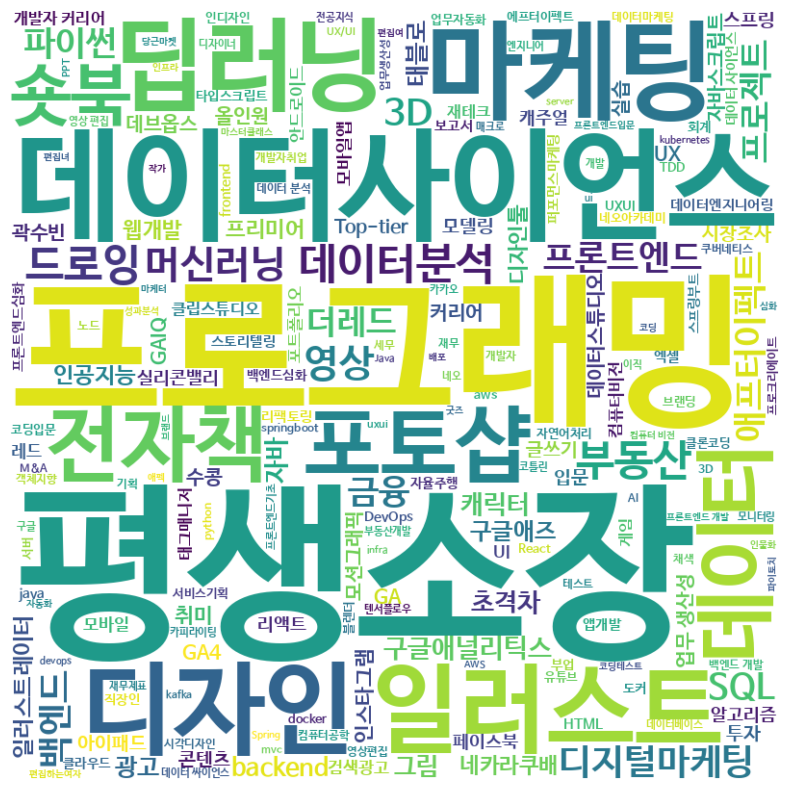

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# keyword 컬럼에서 단어 추출하여 전개
exploded_keywords = course['keywords'].str.split(',').explode()

keywords_count = exploded_keywords.value_counts()

# 워드클라우드로 표현하기
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
                      background_color='white',
                      width=800, height=800).generate_from_frequencies(keywords_count)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
print("가장 많이 등장한 단어:", keywords_count.idxmax())

가장 많이 등장한 단어: 평생소장


#### Q2-5 (Refund) 환불이 가장 많은 강의는 어떤 강의였나요?

In [ ]:
refund

,id,type,state,created_at,updated_at,user_id,course_id,amount,tax_free_amount
0,72124,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:29,2022-12-30 7:29,619833.0,214323.0,-20000,-20000
1,72121,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:01,2022-12-30 7:01,146614.0,213905.0,-10000,-10000
2,72119,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:08,2022-12-30 6:08,541404.0,214402.0,0,0
3,72117,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:00,2022-12-30 6:00,1056095.0,203935.0,-10000,-10000
4,72116,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 5:57,2022-12-30 5:57,98880.0,213244.0,-20000,-20000
...,...,...,...,...,...,...,...,...,...
12669,44843,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:09,2022-01-03 1:09,710222.0,206848.0,-70000,-70000
12670,44842,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:07,2022-01-03 1:07,723215.0,NaN,-70000,-70000
12671,44841,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:06,2022-01-03 1:06,744769.0,203720.0,-10000,-10000
12672,44840,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:05,2022-01-03 1:05,1345.0,204366.0,-10000,-10000


In [ ]:
refund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12674 entries, 0 to 12673
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12674 non-null  int64  
 1   type             12674 non-null  object 
 2   state            12674 non-null  object 
 3   created_at       12674 non-null  object 
 4   updated_at       12674 non-null  object 
 5   user_id          12659 non-null  float64
 6   course_id        12075 non-null  float64
 7   amount           12674 non-null  int64  
 8   tax_free_amount  12674 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 891.3+ KB


In [ ]:
# refund 데이터의 결측치 비율은 약 4.83%로 일단 제거한 후 문제 해결
# NaN 값을 가진 행 분리
refund_id_nan = refund[refund.isnull().any(axis=1)]

# NaN 값이 없는 행만 선택하여 새로운 DataFrame 생성
refund = refund.dropna()

# id 컬럼을 int 타입으로 변환
refund['user_id'] = refund['user_id'].astype('int64')
refund['course_id'] = refund['course_id'].astype('int64')
refund.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12062 entries, 0 to 12673
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               12062 non-null  int64 
 1   type             12062 non-null  object
 2   state            12062 non-null  object
 3   created_at       12062 non-null  object
 4   updated_at       12062 non-null  object
 5   user_id          12062 non-null  int64 
 6   course_id        12062 non-null  int64 
 7   amount           12062 non-null  int64 
 8   tax_free_amount  12062 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 942.3+ KB


<ipython-input-21-defc2e3b8ef9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refund['user_id'] = refund['user_id'].astype('int64')
<ipython-input-21-defc2e3b8ef9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refund['course_id'] = refund['course_id'].astype('int64')


In [ ]:
# 컬럼명 변경
course.rename(columns={'id': 'course_id'}, inplace=True)

# course_id를 기준으로 title 병합
merge_course_refund = pd.merge(refund, course[['course_id', 'title']], on='course_id', how='left')

# 결과 출력
merge_course_refund

,id,type,state,created_at,updated_at,user_id,course_id,amount,tax_free_amount,title
0,72124,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:29,2022-12-30 7:29,619833,214323,-20000,-20000,[쉐어엑스]플러스엑-214323
1,72121,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:01,2022-12-30 7:01,146614,213905,-10000,-10000,초격차 패키지 : -213905
2,72119,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:08,2022-12-30 6:08,541404,214402,0,0,빵형의 수학 없이 -214402
3,72117,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:00,2022-12-30 6:00,1056095,203935,-10000,-10000,한 번에 끝내는 파-203935
4,72116,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 5:57,2022-12-30 5:57,98880,213244,-20000,-20000,30개 사례로 배우-213244
...,...,...,...,...,...,...,...,...,...,...
12057,44844,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:10,2022-01-03 1:10,741497,209093,0,0,배곡파 작가의 웹소-209093
12058,44843,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:09,2022-01-03 1:09,710222,206848,-70000,-70000,The RED : -206848
12059,44841,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:06,2022-01-03 1:06,744769,203720,-10000,-10000,한 번에 끝내는 프-203720
12060,44840,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:05,2022-01-03 1:05,1345,204366,-10000,-10000,30개 글감으로 에-204366


In [ ]:
# title뒤에 붙어있는 course_id를 삭제해서 정리
def remove_last_7_chars(title):
    if isinstance(title, str):  # 문자열인 경우에만 슬라이싱 수행
        return title[:-7]
    else:
        return title

# 'title' 열에 함수 적용
merge_course_refund['title'] = merge_course_refund['title'].apply(remove_last_7_chars)

In [ ]:
# 강의별 환불 횟수 계산
refunded_counts = merge_course_refund.groupby('title').size()
refunded_counts = pd.DataFrame({'title': refunded_counts.index, 'refund_count': refunded_counts.values})

refunded_counts.sort_values(by='refund_count', ascending=True)

,title,refund_count
200,시크릿 코드 : 프,1
129,닷밀 미디어아트 그,1
70,REC.ON : A,1
151,매력적인 모델링과,1
46,CLASS : 프로,1
...,...,...
116,네오아카데미 : 완,237
6,10개 프로젝트로,269
295,한 번에 끝내는 데,304
18,30개 프로젝트로,334


In [ ]:
# 가장 많이 환불된 강의 찾기
refunded_counts = merge_course_refund.groupby('title').size()
print("가장 많이 환불된 강의:", refunded_counts.idxmax(), "/", refunded_counts.max(),"회")

가장 많이 환불된 강의: The RED :  / 670 회


#### Q2-6 (Customer) 강의를 가장 많이 신청한 고객과 그 금액은 얼마인가요?

In [ ]:
customer

,id,type,state,created_at,updated_at,user_id,name,phone,email
0,1482394,USER,NORMAL,2024-01-24 04:44:52,2024-01-24 13:54:05,959919,USER_1482394,1012345678,USER_1482394@notexistemail.com
1,1482300,USER,NORMAL,2024-01-24 04:43:18,2024-01-25 06:10:38,818301,USER_1482300,1012345678,USER_1482300@notexistemail.com
2,1482071,USER,NORMAL,2024-01-24 04:41:50,2024-01-25 07:46:45,543671,USER_1482071,1012345678,USER_1482071@notexistemail.com
3,1445268,USER,NORMAL,2023-12-27 04:17:51,2023-12-27 04:17:51,824733,USER_1445268,1012345678,USER_1445268@notexistemail.com
4,1445150,USER,NORMAL,2023-12-27 04:15:45,2023-12-27 04:15:45,767404,USER_1445150,1012345678,USER_1445150@notexistemail.com
...,...,...,...,...,...,...,...,...,...
123008,86,USER,NORMAL,2019-02-21 22:01:41,2022-10-03 04:25:24,110484,USER_86,1012345678,USER_86@notexistemail.com
123009,56,USER,NORMAL,2019-02-20 11:38:14,2023-03-01 09:35:26,55759,USER_56,1012345678,USER_56@notexistemail.com
123010,52,USER,NORMAL,2019-02-20 07:42:08,2022-09-02 01:15:07,133140,USER_52,1012345678,USER_52@notexistemail.com
123011,46,USER,NORMAL,2019-02-20 03:05:51,2021-05-02 11:25:49,56787,USER_46,1012345678,USER_46@notexistemail.com


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123013 entries, 0 to 123012
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          123013 non-null  int64         
 1   type        123013 non-null  object        
 2   state       123013 non-null  object        
 3   created_at  123013 non-null  datetime64[ns]
 4   updated_at  123013 non-null  datetime64[ns]
 5   user_id     123013 non-null  int64         
 6   name        123013 non-null  object        
 7   phone       123013 non-null  int64         
 8   email       123013 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 8.4+ MB


In [ ]:
# 컬럼명 변경
customer.rename(columns={'id': 'customer_id'}, inplace=True)
order.rename(columns={'id': 'order_id'}, inplace=True)

# customer_id를 기준으로 title 병합
merge_customer_order = pd.merge(customer, order[['customer_id', 'order_id', 'list_price' ]], on='customer_id', how='left')

# order_id 데이터의 결측치 비율은 약 7%로 일단 제거한 후 문제 해결
# NaN 값을 가진 행 분리
order_id_nan = merge_customer_order[merge_customer_order.isnull().any(axis=1)]

# NaN 값이 없는 행만 선택하여 새로운 DataFrame 생성
merge_customer_order = merge_customer_order.dropna()

# id 컬럼을 int 타입으로 변환
merge_customer_order['order_id'] = merge_customer_order['order_id'].astype('int64')

# 결과 출력
merge_customer_order

<ipython-input-28-7977bf444730>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_customer_order['order_id'] = merge_customer_order['order_id'].astype('int64')


,customer_id,type,state,created_at,updated_at,user_id,name,phone,email,order_id,list_price
16,1204943,USER,NORMAL,2023-05-12 08:00:16,2023-08-28 02:42:09,526092,USER_1204943,1012345678,USER_1204943@notexistemail.com,996257,30000.0
17,1204943,USER,NORMAL,2023-05-12 08:00:16,2023-08-28 02:42:09,526092,USER_1204943,1012345678,USER_1204943@notexistemail.com,996252,50000.0
18,1204943,USER,NORMAL,2023-05-12 08:00:16,2023-08-28 02:42:09,526092,USER_1204943,1012345678,USER_1204943@notexistemail.com,977917,20000.0
19,1204943,USER,NORMAL,2023-05-12 08:00:16,2023-08-28 02:42:09,526092,USER_1204943,1012345678,USER_1204943@notexistemail.com,977915,20000.0
20,1204943,USER,NORMAL,2023-05-12 08:00:16,2023-08-28 02:42:09,526092,USER_1204943,1012345678,USER_1204943@notexistemail.com,803223,20000.0
...,...,...,...,...,...,...,...,...,...,...,...
305266,46,USER,NORMAL,2019-02-20 03:05:51,2021-05-02 11:25:49,56787,USER_46,1012345678,USER_46@notexistemail.com,1329769,30000.0
305267,37,USER,NORMAL,2019-02-19 15:22:33,2022-06-18 19:14:56,59402,USER_37,1012345678,USER_37@notexistemail.com,1127779,20000.0
305268,37,USER,NORMAL,2019-02-19 15:22:33,2022-06-18 19:14:56,59402,USER_37,1012345678,USER_37@notexistemail.com,1127253,130000.0
305269,37,USER,NORMAL,2019-02-19 15:22:33,2022-06-18 19:14:56,59402,USER_37,1012345678,USER_37@notexistemail.com,1127110,130000.0


In [ ]:
# 고객별 강의 신청 횟수와 금액을 계산
order_by_customer = merge_customer_order.groupby('customer_id').agg({'order_id': 'count', 'list_price': 'sum'})

# 결과 출력
order_by_customer.sort_values(by='order_id',ascending=False)

,order_id,list_price
customer_id,,
793517,338,8650000.0
777099,308,7760000.0
793514,246,5730000.0
276705,172,4480000.0
98685,159,3610000.0
...,...,...
853056,1,20000.0
853058,1,20000.0
853116,1,30000.0


In [ ]:
print("강의를 가장 많이 신청한 고객 ID:", order_by_customer['order_id'].idxmax())
print("\n신청 횟수:", order_by_customer['order_id'].max(), "회")

강의를 가장 많이 신청한 고객 ID: 793517

신청 횟수: 338 회


#### Q2-7 (Order) 주말과 주중의 평균 강의 신청율은 어떻게 다를까요?

In [ ]:
# created_at 컬럼 에서 요일을 추출하여 요일별 횟수 계산
order_counts_by_day = order.groupby(order['created_at'].dt.day_name()).size()

# 결과 출력
print(order_counts_by_day)

created_at
Friday       41788
Monday       49536
Saturday     28241
Sunday       44818
Thursday     39012
Tuesday      38493
Wednesday    42147
dtype: int64


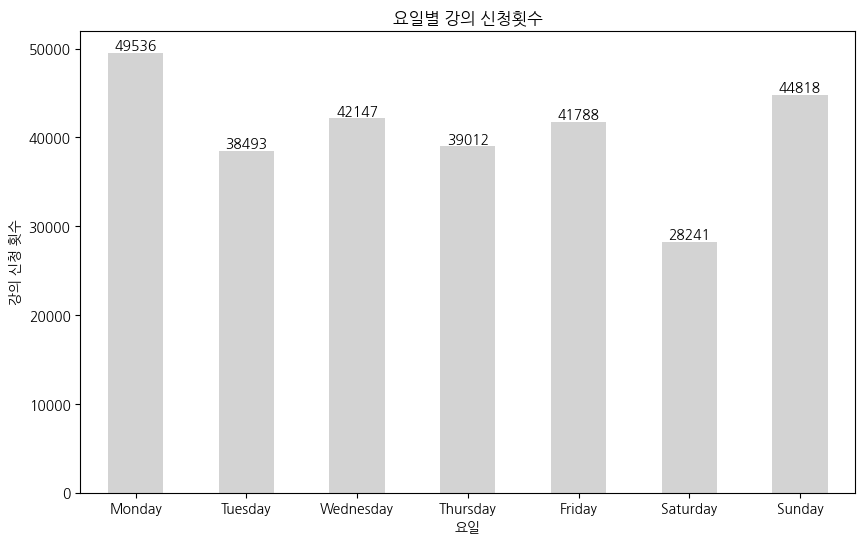

In [ ]:
# 요일별 강의 신청 횟수를 막대 그래프로 표시
plt.figure(figsize=(10, 6))
order_counts_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='lightgrey')
plt.title('요일별 강의 신청횟수')
plt.xlabel('요일')
plt.ylabel('강의 신청 횟수')
plt.xticks(rotation=0)

# 막대 위에 숫자 표시
for idx, value in enumerate(order_counts_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])):
    plt.text(idx, value + 0.2, str(value), ha='center', va='bottom')

plt.show()

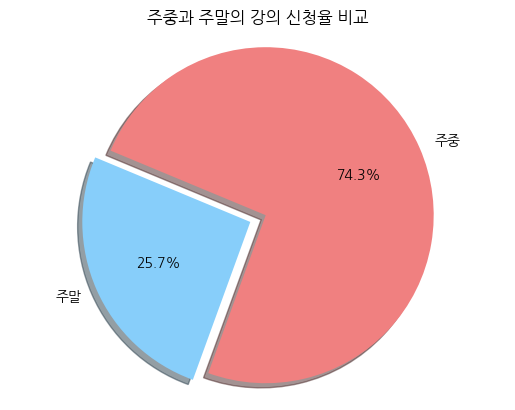

In [ ]:
# 주중(월요일부터 금요일)과 주말(토요일과 일요일)로 주문 데이터를 분류
weekday_orders = order[order['order_date'].dt.dayofweek < 5]
weekend_orders = order[order['order_date'].dt.dayofweek >= 5]

# 주중과 주말 각각의 주문 건수 계산
weekday_order_count = len(weekday_orders)
weekend_order_count = len(weekend_orders)

# 주중과 주말 각각의 주문 비율 계산
total_order_count = weekday_order_count + weekend_order_count
weekday_order_ratio = weekday_order_count / total_order_count
weekend_order_ratio = weekend_order_count / total_order_count

# 파이차트로 주문 비율 시각화
labels = ['주중', '주말']
sizes = [weekday_order_ratio, weekend_order_ratio]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # 주중 부분을 약간 돌출

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=250)
plt.title('주중과 주말의 강의 신청율 비교')
plt.axis('equal')  # 원형으로 표시
plt.show()

#### Q2-8 (User) 주로 몇시에 회원 가입(created_at)이 활발했나요? 월별로 차이가 있는지 보여주고, 그 근거를 추론해 보세요

In [ ]:
user

,id,type,state,created_at,updated_at,last_login_at,username
0,1075089,USER,NORMAL,2022-12-31 23:39:19,2023-12-02 00:00:22,2022-12-31 23:44:35,dkfk
1,1075079,USER,NORMAL,2022-12-31 23:08:47,2023-12-03 23:34:39,2023-12-03 23:34:40,toqu
2,1075074,USER,NORMAL,2022-12-31 22:46:31,2023-10-19 11:49:10,2023-10-19 11:49:10,theh
3,1075064,USER,NORMAL,2022-12-31 22:03:14,2023-10-06 18:20:51,2023-10-06 18:20:51,tige
4,1075059,USER,NORMAL,2022-12-31 21:35:42,2023-02-17 01:54:52,2023-02-17 01:54:52,kyg6
...,...,...,...,...,...,...,...
122984,20,USER,NORMAL,2019-08-19 02:02:33,2024-01-25 02:52:29,2024-01-25 02:52:29,jhki
122985,18,USER,NORMAL,2019-08-19 01:57:00,2022-08-10 23:17:50,2022-08-10 23:17:50,smki
122986,15,USER,NORMAL,2019-07-03 07:19:53,2024-01-10 06:03:52,2024-01-10 06:03:52,nkle
122987,14,USER,NORMAL,2019-07-03 05:42:07,2024-01-25 14:40:44,2024-01-25 14:40:44,jmki


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122989 entries, 0 to 122988
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             122989 non-null  int64 
 1   type           122989 non-null  object
 2   state          122989 non-null  object
 3   created_at     122989 non-null  object
 4   updated_at     122989 non-null  object
 5   last_login_at  122989 non-null  object
 6   username       122988 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.6+ MB


In [ ]:
user[user['username'].isnull()]

,id,type,state,created_at,updated_at,last_login_at,username
97273,411831,USER,NORMAL,2021-05-02 10:19:36,2023-10-31 03:51:49,2023-10-31 03:51:49,NaN


In [ ]:
# 결측치가 있는 행 삭제
user = user.dropna(subset=['username'])

# datetime 타입으로 변환
user['created_at'] = pd.to_datetime(user['created_at'])
user['updated_at'] = pd.to_datetime(user['updated_at'])
user['last_login_at'] = pd.to_datetime(user['last_login_at'])

# 결과 확인
user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122988 entries, 0 to 122988
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             122988 non-null  int64         
 1   type           122988 non-null  object        
 2   state          122988 non-null  object        
 3   created_at     122988 non-null  datetime64[ns]
 4   updated_at     122988 non-null  datetime64[ns]
 5   last_login_at  122988 non-null  datetime64[ns]
 6   username       122988 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(3)
memory usage: 7.5+ MB


<ipython-input-37-cf81f4c89af1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user['created_at'] = pd.to_datetime(user['created_at'])
<ipython-input-37-cf81f4c89af1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user['updated_at'] = pd.to_datetime(user['updated_at'])
<ipython-input-37-cf81f4c89af1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

<ipython-input-38-871590c7ae6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user['signup_hour'] = user['created_at'].dt.hour


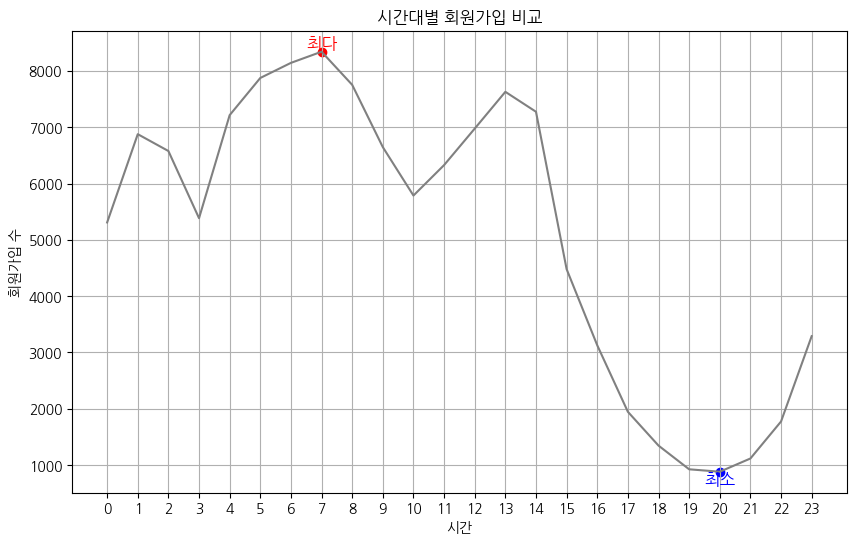

In [ ]:
# 시간 정보를 추출하여 시간대별 회원가입 수를 계산
user['signup_hour'] = user['created_at'].dt.hour
signup_counts_by_hour = user['signup_hour'].value_counts().sort_index(ascending=True)

# 꺾은선 그래프로 시간대별 회원가입 수를 표시
plt.figure(figsize=(10, 6))
plt.scatter(signup_counts_by_hour.idxmax(), signup_counts_by_hour.max(), color='red', label='Max')
plt.scatter(signup_counts_by_hour.idxmin(), signup_counts_by_hour.min(), color='blue', label='Min')
plt.plot(signup_counts_by_hour.index, signup_counts_by_hour.values, linestyle='-', color='gray')
plt.title('시간대별 회원가입 비교')
plt.xlabel('시간')
plt.ylabel('회원가입 수')
plt.xticks(range(24))  # x축 레이블을 시간으로 표시
plt.grid(True)

# 최고점과 최저점 위에 'Max'와 'Min' 표시
plt.text(signup_counts_by_hour.idxmax(), signup_counts_by_hour.max(), '최다', fontsize=12, ha='center', va='bottom', color='red')
plt.text(signup_counts_by_hour.idxmin(), signup_counts_by_hour.min(), '최소', fontsize=12, ha='center', va='top', color='blue')

plt.show()

<ipython-input-39-8fd0ce53abae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user['signup_month'] = user['created_at'].dt.month


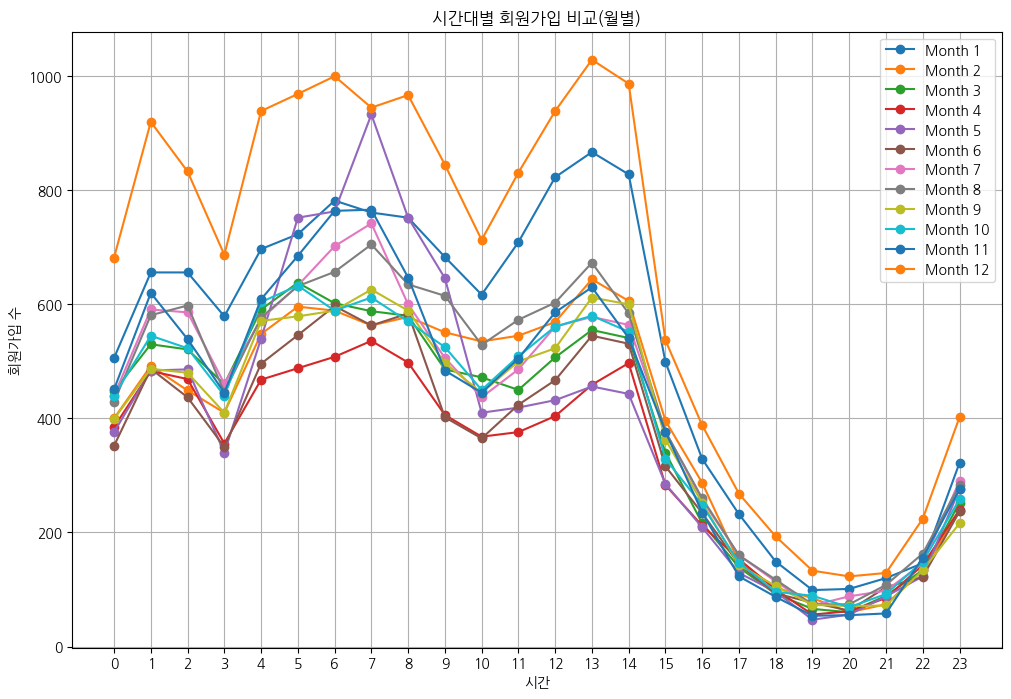

In [ ]:
# 월 정보를 추출하여 월별 회원가입 수를 계산
user['signup_month'] = user['created_at'].dt.month
signup_counts_by_month_and_hour = user.groupby(['signup_month', 'signup_hour']).size().unstack(fill_value=0)

# 월별로 그래프 표시
plt.figure(figsize=(12, 8))

for month in range(1, 13):
    plt.plot(signup_counts_by_month_and_hour.loc[month], label=f'Month {month}', marker='o', linestyle='-')

plt.title('시간대별 회원가입 비교(월별)')
plt.xlabel('시간')
plt.ylabel('회원가입 수')
plt.xticks(range(24))  # x축 레이블을 시간으로 표시
plt.legend()
plt.grid(True)
plt.show()

* 7시 - 9시 사이에 회원가입수가 감소함 (출근시간 영향이 있을 것이라 추측)
* 점심시간(13시)까지 증가하다가 20시까지 감소하는 양상을 보임
* 21시부터 25시까지 다시 증가하다 오전 3시를 대부분 최저점을 기록함
* 5월 오전 7시에 두드러지게 회원가입수가 증가한 이유 파악이 필요

#### Q2-9 (Order) 강의 가격(list_price)을 5만원 단위의 도수분포표로 나타내 주세요.

```
대부분의 강의 가격이 5만원 이하로 추가 데이터 처리가 필요함
```

In [ ]:
# 50,000원 미만의 강의 필터링
cheap_course = order[order['list_price'] < 50000]

# 50000원 미만의 강의의 비율 계산
cheap_course_ratio = len(cheap_course) / len(order) * 100

print("50000원 미만의 강의 비율: {:.2f}%".format(cheap_course_ratio))

50000원 미만의 강의 비율: 94.10%


#### Q2-10 (Order) 신청이 완료된 강의(completed)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중을 월별로 각각 구하시오?

In [ ]:
# customer_id 기준으로 user_id 병합
order_user_merge = pd.merge(order, customer[['customer_id', 'user_id']], on='customer_id', how='left')
# 결측치 제거
order_user_merge = order_user_merge.dropna()

# id 컬럼을 int 타입으로 변환
order_user_merge['user_id'] = order_user_merge['user_id'].astype('int64')

order_user_merge

<ipython-input-41-06f609517175>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_user_merge['user_id'] = order_user_merge['user_id'].astype('int64')


,order_id,type,state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,order_date,discount_rate,user_id
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0,2022-12-31,100.0,1075089
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000,2022-12-31,0.0,115164
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000,2022-12-31,50.0,1063801
3,1600577,ORDER,COMPLETED,백엔드 개발자를 위,2022-12-31 23:35:52,2022-12-31 23:36:09,1083664,20000,20000,10000,20000,2022-12-31,50.0,1075074
4,1600574,ORDER,COMPLETED,React Nati,2022-12-31 23:30:51,2022-12-31 23:31:13,1033553,20000,20000,0,20000,2022-12-31,0.0,1024503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284030,773397,ORDER,COMPLETED,한 번에 끝내는 딥,2022-01-01 00:18:42,2022-01-01 00:18:44,753996,30000,0,30000,0,2022-01-01,100.0,743883
284031,773396,ORDER,COMPLETED,초격차 패키지 :,2022-01-01 00:18:33,2022-01-01 00:18:57,12693,30000,30000,0,30000,2022-01-01,0.0,19542
284032,773394,ORDER,CANCELLED,한 번에 끝내는 딥,2022-01-01 00:17:19,2022-01-01 00:17:29,753996,30000,30000,0,30000,2022-01-01,0.0,743883
284033,773392,ORDER,PENDING,초격차 패키지 :,2022-01-01 00:13:43,2022-01-01 00:13:43,12693,30000,30000,0,30000,2022-01-01,0.0,19542


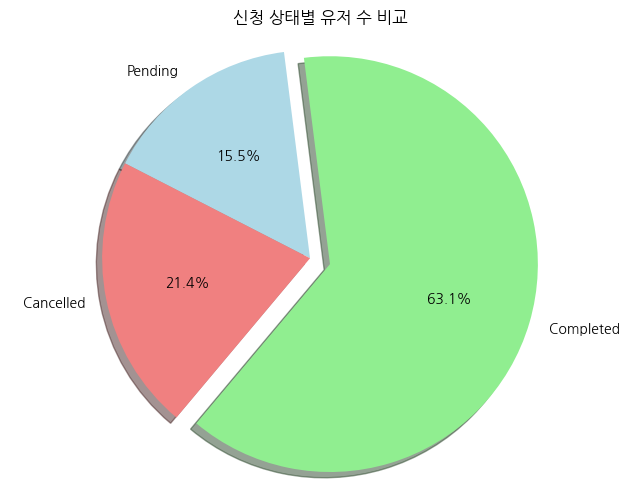

In [ ]:
# 각 상태별로 유저 수 세기
completed_users = order_user_merge.loc[order_user_merge['state'] == 'COMPLETED', 'user_id'].nunique()
pending_users = order_user_merge.loc[order_user_merge['state'] == 'PENDING', 'user_id'].nunique()
cancelled_users = order_user_merge.loc[order_user_merge['state'] == 'CANCELLED', 'user_id'].nunique()

# 전체 유저 수 세기
total_users = completed_users + pending_users + cancelled_users

# 각 상태별 비율 계산
completed_user_ratio = completed_users / total_users
pending_user_ratio = pending_users / total_users
cancelled_user_ratio = cancelled_users / total_users

# 비율 데이터
labels = ['Completed', 'Pending', 'Cancelled']
sizes = [completed_user_ratio, pending_user_ratio, cancelled_user_ratio]
colors = ['lightgreen', 'lightblue', 'lightcoral']
explode = (0.1, 0, 0)  # Completed 부분을 돌출시킴

# 파이차트 생성
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=230)
plt.title('신청 상태별 유저 수 비교')
plt.axis('equal')  # 원형으로 표시
plt.show()

In [ ]:
# 각 상태별로 금액의 합계와 횟수 계산
state_summary = order_user_merge.groupby('state').agg({'list_price': 'sum', 'order_id': 'count'})

# 컬럼명 변경
state_summary = state_summary.rename(columns={'list_price': '총 금액', 'order_id': '횟수'})
state_summary.index.name = '상태'

# 순서 변경
state_summary = state_summary.reindex(['COMPLETED', 'PENDING', 'CANCELLED'])

# 결과 출력
state_summary

,총 금액,횟수
상태,,
COMPLETED,4827700000,176060
PENDING,1418600000,49754
CANCELLED,1779880000,58125


In [ ]:
# 월별로 데이터 그룹화
order_user_merge['order_date_month'] = order_user_merge['order_date'].dt.month

# 각 상태별로 월별 금액과 사용자 비중 계산
monthly_stats = order_user_merge.groupby(['state', 'order_date_month']).agg(
    total_price=('list_price', 'sum'),
    unique_users=('user_id', 'nunique')
).reset_index()

print(monthly_stats)

        state  order_date_month  total_price  unique_users
0   CANCELLED                 1    218170000          4367
1   CANCELLED                 2    140410000          3211
2   CANCELLED                 3    138710000          2880
3   CANCELLED                 4    132670000          2455
4   CANCELLED                 5    104960000          2187
5   CANCELLED                 6    126640000          2717
6   CANCELLED                 7    166830000          3067
7   CANCELLED                 8    142310000          3173
8   CANCELLED                 9    149670000          3088
9   CANCELLED                10    131900000          2806
10  CANCELLED                11    146690000          2866
11  CANCELLED                12    180920000          3487
12  COMPLETED                 1    515350000         14856
13  COMPLETED                 2    396660000         11338
14  COMPLETED                 3    341130000          9785
15  COMPLETED                 4    326280000          88

#### Q2-11 (User) state이 HIBERNATED 된 User들은 ID를 생성(created_at)하고 마지막 로그인(last_login_at)까지 평균적으로 몇일이 걸렸나요?

In [ ]:
user['state'].unique()

array(['NORMAL', 'DELETED', 'WITHDRAWN', 'HIBERNATED', 'ZOMBIE'],
      dtype=object)

In [ ]:
# 휴면계정인 유저 필터링
hibernated_users = user[user['state'] == 'HIBERNATED'].copy()  # 복사본 생성

# 'created_at'와 'last_login_at' 사이의 일수를 계산하여 새로운 컬럼 추가
hibernated_users['hibernated_days'] = (hibernated_users['last_login_at'] - hibernated_users['created_at']).dt.days

# 평균 일수 계산
average_days = np.mean(hibernated_users['hibernated_days']).round(2)

# 결과 출력
print("휴면 회원의 ID 생성 후 마지막 로그인까지 평균 경과 일수:", average_days, "일")

휴면 회원의 ID 생성 후 마지막 로그인까지 평균 경과 일수: 154.11 일


## 2.2 Trend Analysis
각 Dataset(order, course, user, customer and refund)에서
2022년 1월 부터 12월까지의 데이터를 월별로 집계하여 볼 수 있는 트렌드를 하나씩만 보여주세요. Trend를 이용할 때는 어떤 차트를 이용하는 것이 좋을까요?

* 막대그래프를 사용하면 여러 범주의 값을 비교하거나 단일 범주에 대해 일정 기간 동안의 값 변화를 비교할 수 있습니다.
* 꺾은선 그래프의 경우 값의 연속 또는 흐름 (추세)에 중점을 두어 설명할 수 있습니다.

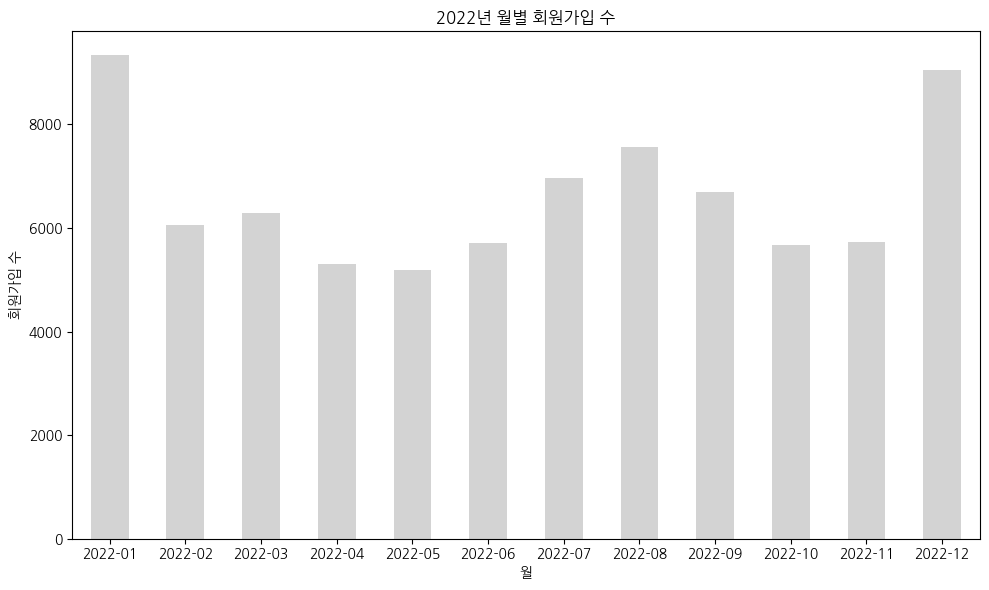

In [ ]:
# 2022년 데이터 추출
user2022 = user[(user['created_at'].dt.year == 2022)]

# created_at 컬럼을 기준으로 월별 회원가입 수 계산
monthly_signups = user2022.groupby(user2022['created_at'].dt.to_period('M')).size()

# 그래프 생성
plt.figure(figsize=(10, 6))
monthly_signups.plot(kind='bar', color='lightgrey')
plt.title('2022년 월별 회원가입 수')
plt.xlabel('월')
plt.ylabel('회원가입 수')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

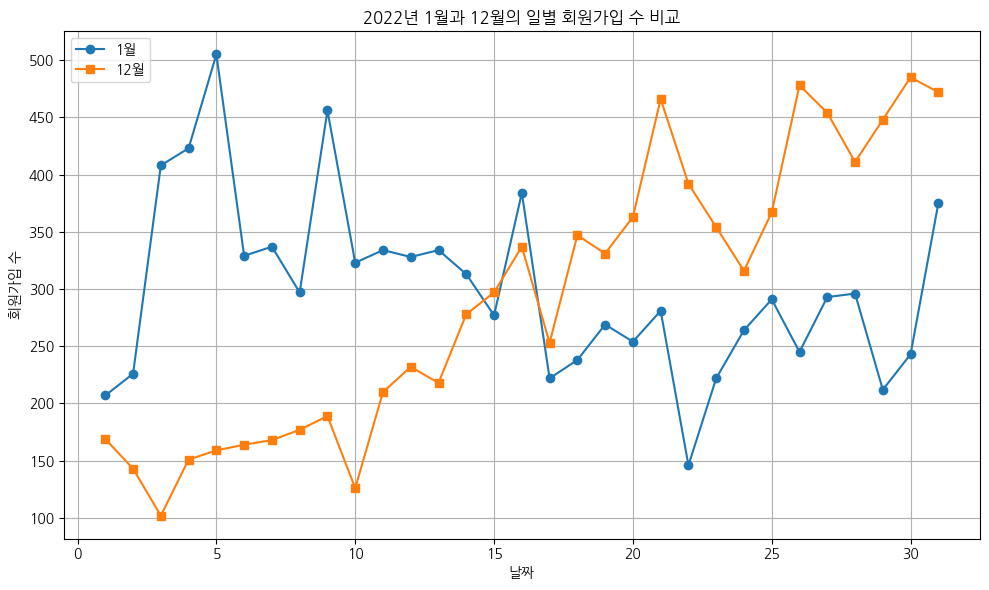

In [ ]:
# 2022년 1월과 12월 데이터 추출
january_data = user[(user['created_at'].dt.year == 2022) & (user['created_at'].dt.month == 1)]
december_data = user[(user['created_at'].dt.year == 2022) & (user['created_at'].dt.month == 12)]

# 1월과 12월의 일별 회원가입 수 계산
january_daily_signups = january_data.groupby(january_data['created_at'].dt.day).size()
december_daily_signups = december_data.groupby(december_data['created_at'].dt.day).size()

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(january_daily_signups.index, january_daily_signups.values, label='1월', marker='o')
plt.plot(december_daily_signups.index, december_daily_signups.values, label='12월', marker='s')
plt.title('2022년 1월과 12월의 일별 회원가입 수 비교')
plt.xlabel('날짜')
plt.ylabel('회원가입 수')
plt.legend()
plt.grid(True)
plt.tight_layout()

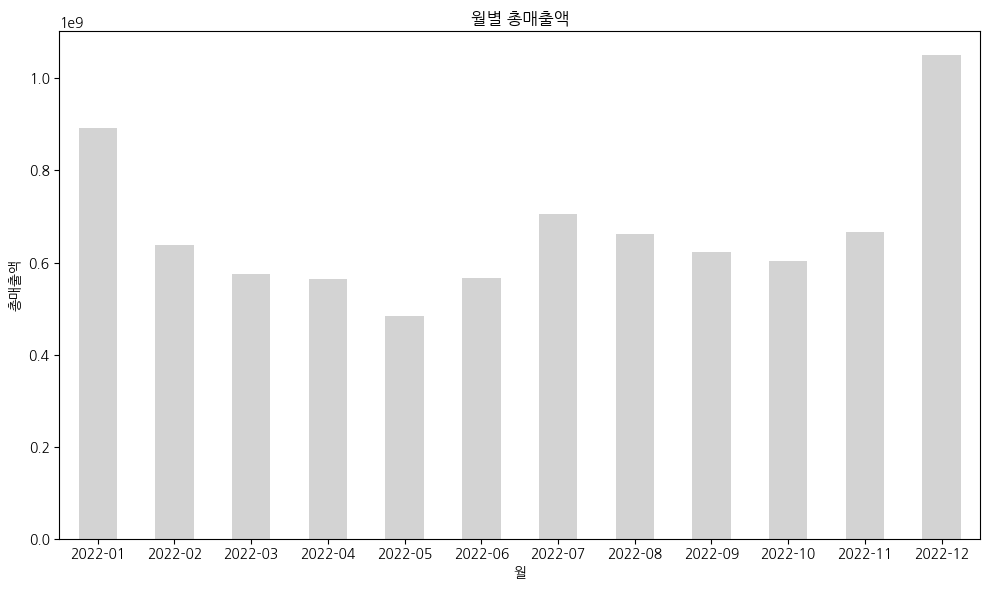

In [ ]:
# order_date 컬럼을 기준으로 월별 list_price 합계 계산
monthly_sales = order.groupby(order['order_date'].dt.to_period('M'))['list_price'].sum()

# 그래프 생성
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='lightgrey')
plt.title('월별 총매출액')
plt.xlabel('월')
plt.ylabel('총매출액')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

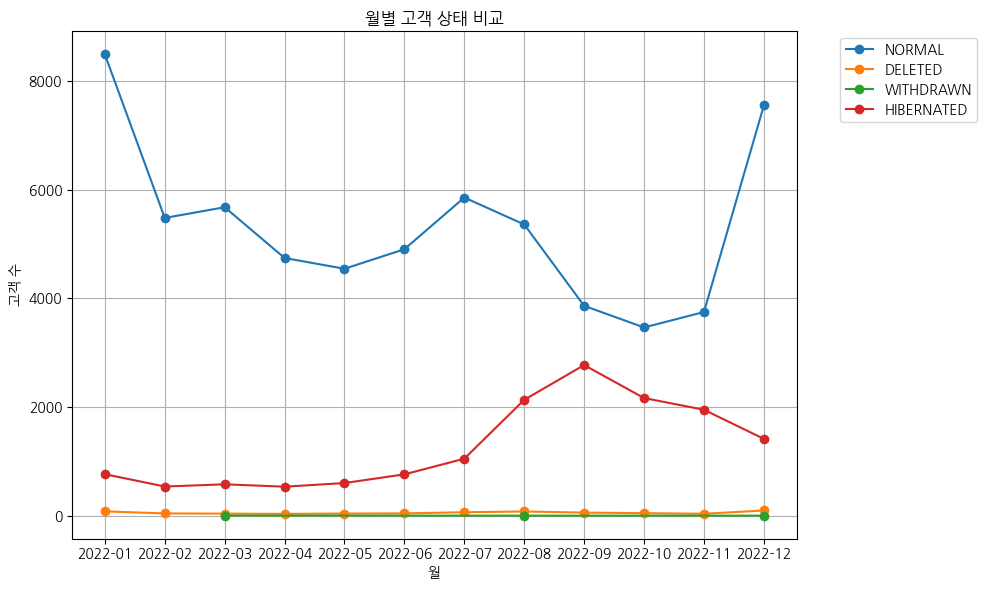

In [ ]:
# 2022년 데이터 추출
customer2022 = customer[(customer['created_at'].dt.year == 2022)]

# 고객 상태별로 데이터 분리
normal_customers = customer2022[customer2022['state'] == 'NORMAL']
deleted_customers = customer2022[customer2022['state'] == 'DELETED']
withdrawn_customers = customer2022[customer2022['state'] == 'WITHDRAWN']
hibernated_customers = customer2022[customer2022['state'] == 'HIBERNATED']

# 월별 고객 수 계산
monthly_normal_counts = normal_customers.groupby(normal_customers['created_at'].dt.to_period('M')).size()
monthly_deleted_counts = deleted_customers.groupby(deleted_customers['created_at'].dt.to_period('M')).size()
monthly_withdrawn_counts = withdrawn_customers.groupby(withdrawn_customers['created_at'].dt.to_period('M')).size()
monthly_hibernated_counts = hibernated_customers.groupby(hibernated_customers['created_at'].dt.to_period('M')).size()

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(monthly_normal_counts.index.astype(str), monthly_normal_counts.values, label='NORMAL', marker='o')
plt.plot(monthly_deleted_counts.index.astype(str), monthly_deleted_counts.values, label='DELETED', marker='o')
plt.plot(monthly_withdrawn_counts.index.astype(str), monthly_withdrawn_counts.values, label='WITHDRAWN', marker='o')
plt.plot(monthly_hibernated_counts.index.astype(str), monthly_hibernated_counts.values, label='HIBERNATED', marker='o')
plt.title('월별 고객 상태 비교')
plt.xlabel('월')
plt.ylabel('고객 수')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 그래프의 바깥쪽에 배치
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

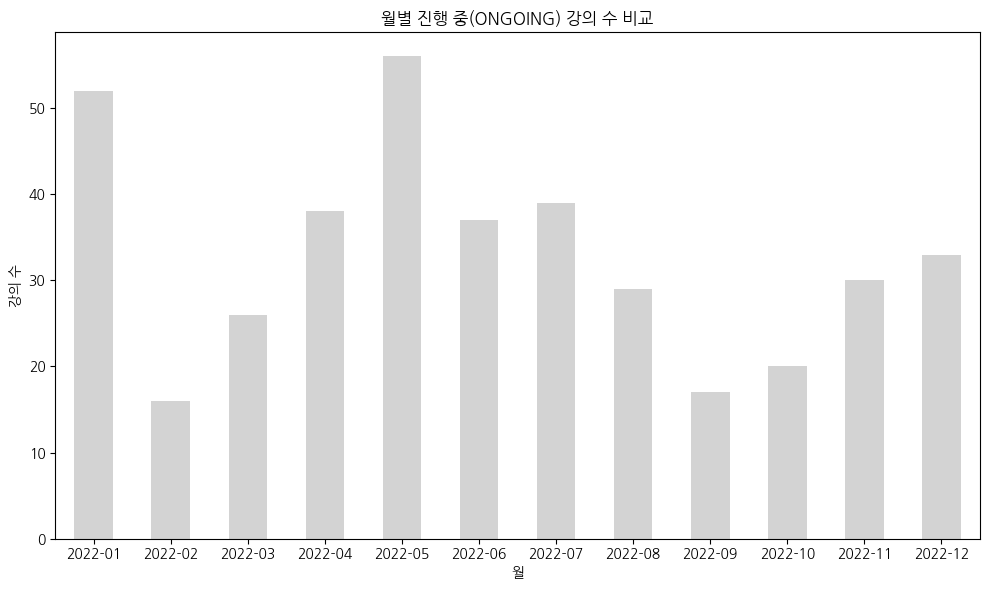

In [ ]:
# created_at 컬럼을 날짜 형식으로 변환
course['created_at'] = pd.to_datetime(course['created_at'])

# 2022년 데이터 추출
course2022 = course[course['created_at'].dt.year == 2022]

# state가 ONGOING이고 중복되지 않는 강의 개수를 월별로 계산
ongoing_courses = course2022[course2022['state'] == 'ONGOING'].drop_duplicates(subset='title')
monthly_ongoing_courses = ongoing_courses.groupby(course2022['created_at'].dt.to_period('M')).size()

# 그래프 생성
plt.figure(figsize=(10, 6))
monthly_ongoing_courses.plot(kind='bar', color='lightgrey')
plt.title('월별 진행 중(ONGOING) 강의 수 비교')
plt.xlabel('월')
plt.ylabel('강의 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

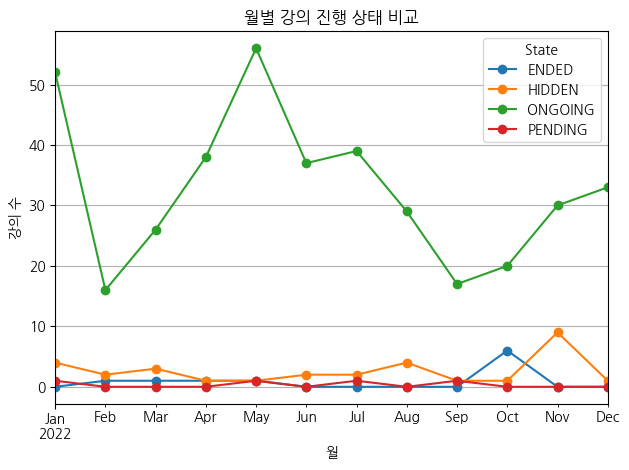

In [ ]:
# 각 상태별로 강의 수 계산
course_state_counts = course2022.groupby([course2022['created_at'].dt.to_period('M'), 'state']).size().unstack(fill_value=0)

# 그래프 생성
plt.figure(figsize=(10, 6))
course_state_counts.plot(kind='line', marker='o')
plt.title('월별 강의 진행 상태 비교')
plt.xlabel('월')
plt.ylabel('강의 수')
plt.legend(title='State')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-53-724f6e700bba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refund['created_at'] = pd.to_datetime(refund['created_at'])


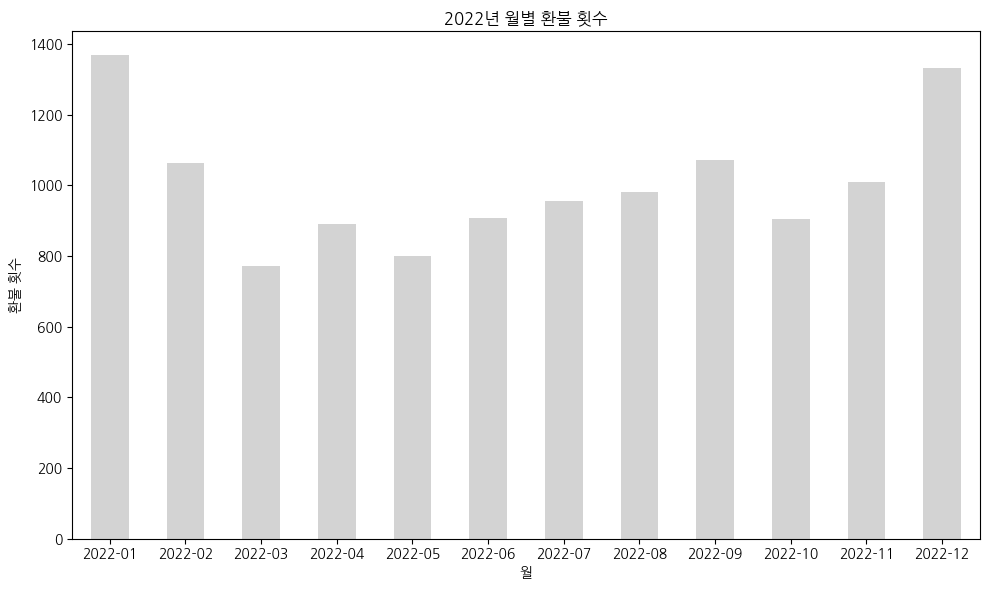

In [ ]:
# created_at 컬럼을 날짜 형식으로 변환
refund['created_at'] = pd.to_datetime(refund['created_at'])

# 2022년 데이터 추출
refund2022 = refund[refund['created_at'].dt.year == 2022]

# 월별 환불 횟수 계산
monthly_refund_counts = refund2022.groupby(refund2022['created_at'].dt.to_period('M')).size()

# 그래프 생성
plt.figure(figsize=(10, 6))
monthly_refund_counts.plot(kind='bar', color='lightgrey')
plt.title('2022년 월별 환불 횟수')
plt.xlabel('월')
plt.ylabel('환불 횟수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

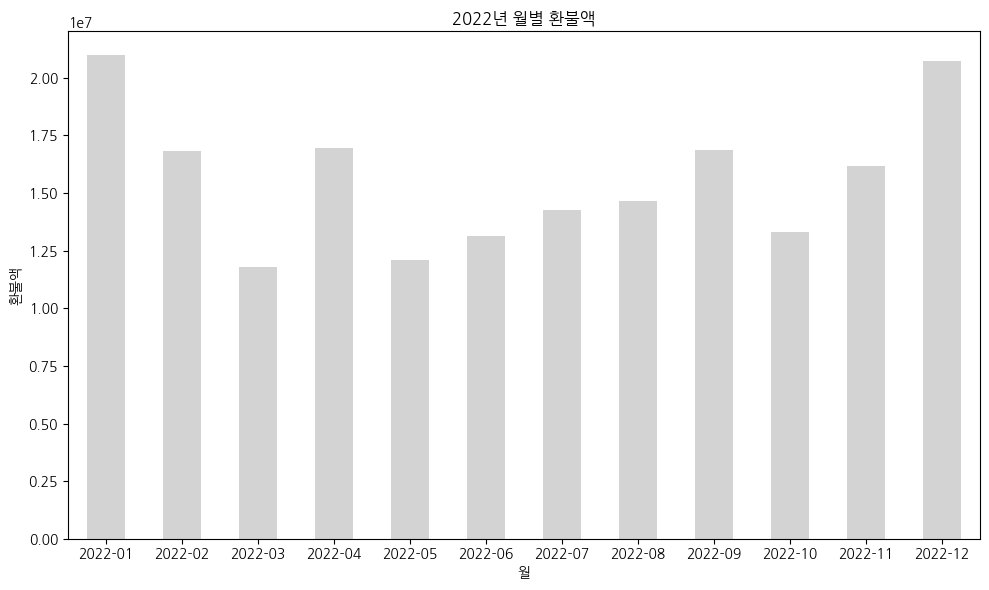

In [ ]:
# 절댓값으로 환불액 계산
refund2022['amount'] = refund2022['amount'].abs()

# 월별 환불액 계산
monthly_refund_amounts = refund2022.groupby(refund2022['created_at'].dt.to_period('M'))['amount'].sum()

# 그래프 생성
plt.figure(figsize=(10, 6))
monthly_refund_amounts.plot(kind='bar', color='lightgrey')
plt.title('2022년 월별 환불액')
plt.xlabel('월')
plt.ylabel('환불액')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Data Documentation & Reporting
위의 2번 Analysis를 Documentation으로 정리하고 Data Analytics Report를 만들어 보려고 합니다.

## 3.1 Data Documentation
2.1 Descriptive Analysis에서 분석한 내용들을 문서화(juptyter notebook, excel, or pdf)하여 github에 올려주세요. 분석 내용을 처음 보는 사람도 이해할 수 있게 주석과 설명을 추가하면 좋습니다.

## 3.2 Data Reporting(Dashboard)
2.1과 2.2의 답변과 수강생분들 개인의 분석을 추가하여 하나의 Dashboard를 만들어주세요. 데이터셋중 원하는 하나를 선택하여 그 하나에 대한 Dashboard를 만들어 주세요. 엑셀, 파워포인트, 태블로, 파이썬 모두 좋습니다.